In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing metrics for mean squared error and regression score
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
diabetes = datasets.load_diabetes()

In [4]:
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = pd.Series(diabetes.target)
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
df_diabetes.shape

(442, 11)

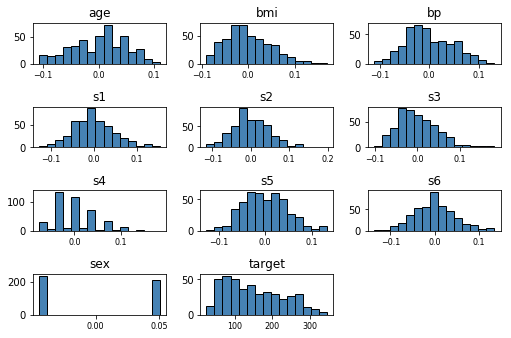

In [25]:
# Data has been scaled and normalized
df_diabetes.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, xlabelsize=8, grid = False)

plt.tight_layout(rect = (0,0,1.2,1.2))

In [55]:
# Splitting the features into training and test sets
diabetes_features = df_diabetes.drop(['target'], axis = 1)
diabetes_X_train = diabetes_features[:-20]
diabetes_X_test = diabetes_features[-20:]

In [56]:
# Split the target variable into training and test sets
diabetes_y_train = df_diabetes['target'][:-20]
diabetes_y_test = df_diabetes['target'][-20:]

In [57]:
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
# Predict on the test set
diabetes_y_pred = regr.predict(diabetes_X_test)

In [60]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# Mean squared error and regression score
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Variance score: 0.59


In [73]:
diabetes_y_pred

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

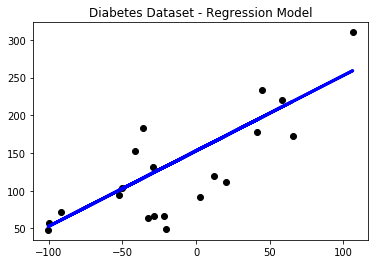

In [88]:
# Plot outputs
plt.scatter(diabetes_X_test.dot(regr.coef_), diabetes_y_test,  color='black')
plt.plot(diabetes_X_test.dot(regr.coef_), diabetes_y_pred, color='blue', linewidth=3)

plt.title('Diabetes Dataset - Regression Model')
plt.savefig('plots/reg.png', dpi=300, transparent=False)
plt.show()